##### This is the basic of heirarchical clustering and k means clustering. The hierarchical clustering basically works in two approaches top to down and bottom up approach or agglomerative clustering and divisive clustering
##### This is effective in small datasets as the time taken is really huge
##### We use distance as the similarity measure here. Combine points with least distance into a single cluster and keep repeating the same.
##### For non Eucledian spaces, use clusteroids - a point that acts like a representation for all points.
#####  clusteroids can be average/ centroid/min of pairwise distance/max of pairwise distance


In [27]:
"""
1. Take all pairs of points and calculate their distance -> O(n^2)
2. put them in priority queue and retreive the least value -> still time is O(n^2)
3. Merge 2 clusters and remove all the entries in priority queue involving one of these clusters : deletion is O(nlogn) as there are 2n deletions and time taken for 1 deletion is O(logn)
4. Compute distances b/w new clusters of the remaining clusters ->O(nlogn)
5. Total time -> O(n^2 logn) when n>> then hierarchical musnt be used.

1. say we already have clusters and we need to know to which cluster we must put a new data into, we need to choose the optimal linkage:
 single linkage 
 complete linkage
 average linkage
 centroid linkage
 wards linkage

The similarity measure or affinity could be manhattan or Eucledian distance
Eucledian vs Non Eucledian:
A eucledian space has some real valued dimensions and dense points
A non eucledian space is based on properties of the points not the location 
eg jaccard distance =  1 - ratio of sizes of intersection and unions
Cosine Distance = angle between the vectors from origin and points in question
Edit distances = number of edits or deletes between two vectors
"""

'\n1. Take all pairs of points and calculate their distance -> O(n^2)\n2. put them in priority queue and retreive the least value -> still time is O(n^2)\n3. Merge 2 clusters and remove all the entries in priority queue involving one of these clusters : deletion is O(nlogn) as there are 2n deletions and time taken for 1 deletion is O(logn)\n4. Compute distances b/w new clusters of the remaining clusters ->O(nlogn)\n5. Total time -> O(n^2 logn) when n>> then hierarchical musnt be used.\n\n1. say we already have clusters and we need to know to which cluster we must put a new data into, we need to choose the optimal linkage:\n single linkage \n complete linkage\n average linkage\n centroid linkage\n wards linkage\n\nThe similarity measure or affinity could be manhattan or Eucledian distance\nEucledian vs Non Eucledian:\nA eucledian space has some real valued dimensions and dense points\nA non eucledian space is based on properties of the points not the location \neg jaccard distance =  1 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as hc

In [29]:
# normalisation is to transform the variable to come between 0 and 1. Standardise is to transform the variable to have a mean of 0 and sd of 1
data = pd.read_csv("Wholesale_customer.csv")
print(data.head(2))


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776


In [30]:
data_scaled = pd.DataFrame(normalize(data),columns = data.columns)
print(data_scaled.head(2))


    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  


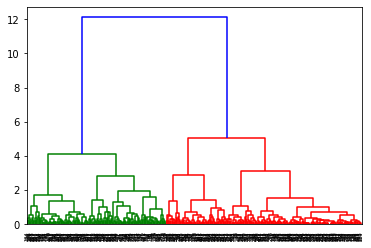

In [14]:
dend = hc.dendrogram(hc.linkage(data_scaled,method = "ward"))

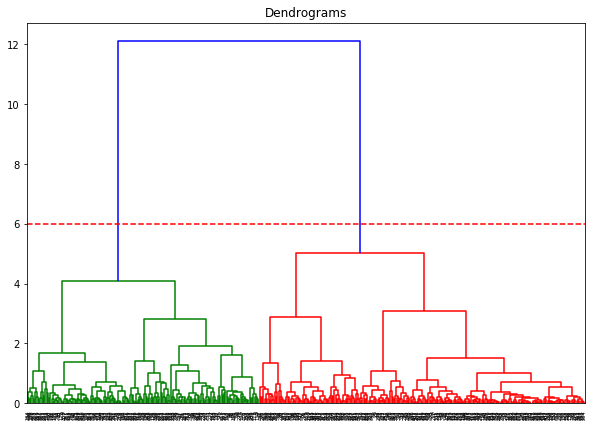

In [31]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = hc.dendrogram(hc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [37]:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

cluster.fit_predict(data_scaled)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

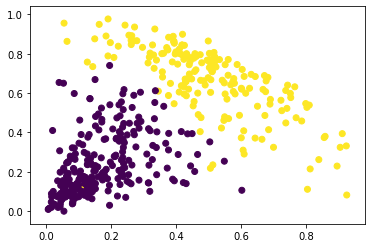

In [39]:
# see the data separation using plot:
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c = cluster.labels_)

In [42]:

silhouette_scores = {}
c = {}
k = [2,3,4,5,8]
for i in k:
    cluster = AgglomerativeClustering(n_clusters = i,affinity = "euclidean",linkage = 'ward')
    c[i] = cluster.fit_predict(data_scaled)
    silhouette_scores[i] = silhouette_score(data_scaled,c[i])
    



Text(0, 0.5, 'silhouette_scores')

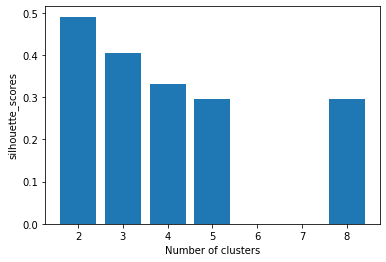

In [43]:
plt.bar(k,silhouette_scores.values())
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_scores")




### Cluster 2 gives a better silhouette score than the others! The other metrics which can be used are the dunn index.